In [20]:
# usual imports in a classic ML pipeline for Regression
# pip install numpy
# pip install pandas
# pip install seaborn
# pip install scikit-learn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

<h3>Data Set Link</h3>
<a href="https://www.kaggle.com/datasets/mohannapd/linear-regression-sales-prediction-of-carseats">
    Linear Regression Sales Prediction of Car Seats Dataset
</a>


<h3>STEP 1 - Load the data </h3>

In [21]:
# load the data
df = pd.read_csv("CarSeats.csv")

# let's quickly see the first 5 rows of data
df.head()


,No,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,1,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,2,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,3,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,4,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,5,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [22]:
# do we have missing values? apparently not
# dataset can't have any missing values when passing the data
# to the machine learning algorithm
df.isna().sum()

No             0
Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [23]:
# do we have duplicates?
int(df.duplicated().sum())

0

In [ ]:
# drop No field since it is not required
df.drop(columns=['No'], inplace=True)


In [ ]:
# Check value counts for ShelveLoc before modifying ordinal categories
df['ShelveLoc'].value_counts()


ShelveLoc
Medium    219
Bad        96
Good       85
Name: count, dtype: int64

In [26]:
# Map ShelveLoc - Ordinal categories
category_mapper = {
'Good': 2,
'Medium': 1,
'Bad': 0
}
df['ShelveLoc'] = df['ShelveLoc'].replace(category_mapper)

df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,Yes,Yes
1,11.22,111,48,16,260,83,2,65,10,Yes,Yes
2,10.06,113,35,10,269,80,1,59,12,Yes,Yes
3,7.40,117,100,4,466,97,1,55,14,Yes,Yes
4,4.15,141,64,3,340,128,0,38,13,Yes,No


In [27]:
from sklearn.preprocessing import LabelEncoder

# list all variables that can be binary-converted
variables = ['Urban', 'US']

# load the encoder
encoder = LabelEncoder()

# convert the listed variables
df[variables] = df[variables].apply(encoder.fit_transform)

df.head()


,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,2,65,10,1,1
2,10.06,113,35,10,269,80,1,59,12,1,1
3,7.40,117,100,4,466,97,1,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0


<h3>Data is good to go (all numbers) => train model etc </h3>


In [28]:
# first step, we split our data into SUPPORT variables and the TARGET variable
# X => support variables, y => target variable

# X => list of support variables the model uses 
# while predicting the target variable with the model
X = df.drop("Sales", axis=1)

# our target variable is y
y = df['Sales']

In [29]:
# secondly, train/test -split with scikit-learn's helper function
# 0.3 for testing => 30% of data is reserved for testing purposes
# and based on that => it's deduced that 70% will be in the training data

# you can also define the random state, which is sometimes useful
# if you want to "lock down" all the randomness in order to get same results every time
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [30]:
# create the model and train it with the data
model = LinearRegression()
model.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [31]:
# we need to create test predictions based on our earlier reserved test dataset
# this data has never been seen by the model by now
predictions = model.predict(X_test)

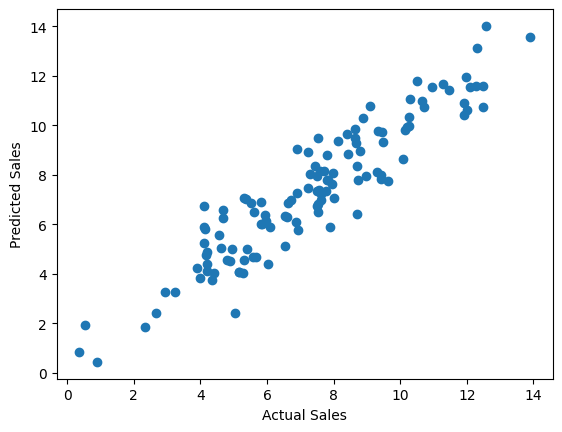

In [32]:
# let's plot how far the predictions are from the real target values (y)
# in the test dataset

# if the values follow a diagonal line (from bottom left to top right)
# => we have good predictions with the model
# we basically compare the predicted values to the actual true values 
# and compare the differences
plt.scatter(y_test, predictions)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.show()

<h3> Findings from Scatter Plot </h3>
<li> As actual sales increase, predicted sales also increase </li>
<li> Most predictions are very close to actual sales, and there are no extreme outliers. </li>

In [33]:
# MAE = Mean average error
mae = metrics.mean_absolute_error(y_test, predictions)
print("MAE:")
print(f"{round(mae, 2)} $")

# MSE = Mean squared error
mse = metrics.mean_squared_error(y_test, predictions)
print("\nMSE:")
print(f"{round(mse, 2)} $^2")

# RMSE = Root Mean Squared Error
rmse = np.sqrt(mse)
print("\nRMSE:")
print(f"{round(rmse, 2)} $")

# R-square (or R2) - how well the model describes the original dataset
# 1 => model describes the data perfectly
# 0 => model doesn't describe the data at all
r2 = metrics.r2_score(y_test, predictions)
print("\nR-squared:")
print(f"{round(r2, 2)}")

MAE:
0.81 $

MSE:
1.04 $^2

RMSE:
1.02 $

R-squared:
0.86


C:\Users\Gayani\AppData\Local\Temp\ipykernel_25760\2920752686.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test - predictions))


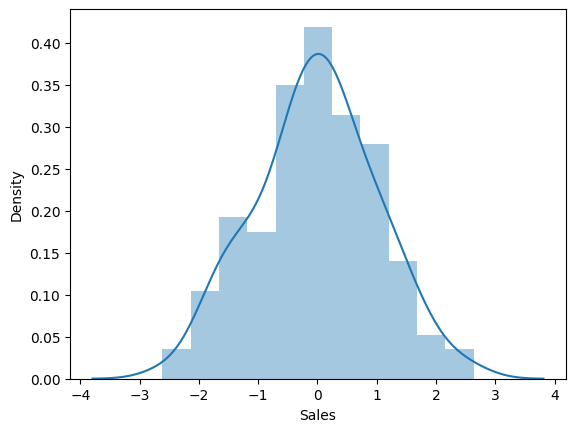

In [34]:
# if the prediction distribution is far from standard normal distritbuion
# then the model is not probably good enough
# distplot is deprecated and will be removed in future seaborn versions
# but not direct replacement has been created so far
sns.distplot((y_test - predictions))
plt.show()
plt.close()

The data are normally distributed and centered around zero, indicating that the linear regression assumptions are reasonably satisfied. There is no strong skewness or extreme outliers observed. This suggests that the model fits the data adequately.

In [35]:
X.columns

Index(['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='str')

<h3>Test the Trained Regression Model</h3>

In [36]:
tester_row = {
    'CompPrice': 120,
    'Income': 70,
    'Advertising': 10,
    'Population': 300,
    'Price': 100,
    'ShelveLoc': 2,   # encoded (Bad=0, Medium=1, Good=2)
    'Age': 50,
    'Education': 15,
    'Urban': 1,       # Yes=1, No=0
    'US': 1           # Yes=1, No=0
}

tester_row = pd.DataFrame([tester_row])


In [37]:
result = model.predict(tester_row)[0]

print()
print("Predicted sales:")
print(f"{round(float(result), 2)}")
print("----------------------------")



Predicted sales:
11.63
----------------------------


<h4> MAE = 0.81; MAE (Mean Absolute Error) is the average of the absolute differences between the predicted values and the actual values </h4>
<p>Example:
<li> Actual sales = 10.0 </li>
<li> Predicted sales ≈ 9.2 or 10.8 </li>
</p>

<h4> MSE = 1.04; MSE (Mean Squared Error)is the average of the squared differences between predicted and actual values:</h4>

<li>The average squared difference between predicted and actual sales is 1.04 (sales units squared).</li>
<li>The typical squared error is small, meaning most predictions are close</li>



<h4> RMSE = 1.02; RMSE (Root Mean Squared Error)is simply the square root of MSE:</h4>

<li>Typical prediction error ≈ 1 sale unit</li>
<li>RMSE > MAE slightly → means; A few larger errors exist but nothing extreme. If RMSE was much larger than MAE, that would indicate some serious outliers</li>
<li>Predicts 10 units sold, but actual sales are 9 or 11 → acceptable, RMSE ≈ 1 → tells that the inventory planning will rarely be off by more than 1–2 units</li>



<h4> R-squared = 0.86; This means 86% of the variation in Sales is explained by the model</h4>

<li> Only 14% is due to factors the model doesn’t know about (customer behavior, store layout, promotions, randomness, etc.)</li>
<li> R² = 1.0 → perfect predictions (almost impossible in real life) / R² = 0.0 → model is useless / R² = 0.86 → very strong model </li>

The model explains 86% of the variability in sales, with an average prediction error of about one unit, indicating strong predictive performance.